># **<span style="color:#ef233c">Time Series Analysis Of FNIRS</span>**
>- ***<span style="color:#13315c"> Gokul Agrawal | CL24M004<span>*** 
>- ***<span style="color:#13315c"> Shreenandan Sahu | CL24M013<span>***
>- ***<span style="color:#13315c"> K S Suraksha Jain | CL24M015<span>***


>### **<span style="color:#ef233c">Frequency Domain Analysis</span>**


 **<span style="color:teal">Defination**: A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques.

*<span style="color:#9e0059">In This notebook we will focus on doing the Frequency Domain Analysis. We have tried to do the following analysis.*


- **<span style="color:#e09f3e">Fourier Transform (FT)**:  A mathematical transformation that decomposes a signal into its constituent frequencies.
- **<span style="color:#e09f3e">Power Spectral Density (PSD)**: A function that shows the distribution of power (or variance) across different frequencies in a signal.
- **<span style="color:#e09f3e">Bandpass and Filtering Analysis**: A technique to isolate and examine specific frequency bands of interest within a signal.

*<span style="color:#9e0059">In this notebook we have tried analysing the data using python inbuilt functions and we have also developed our own code to compute the same frequency domain parameter and compared them. Every block of code has an explanation markdown.*



> ### **<span style="color:#ff0054">ABOUT DATA SET**
We have used FNIRS data recorded for ***<span style="Color:#e09f3e">Frontotemporal activation differs between perception of simulated cochlear implant speech and speech in background noise: An image-based fNIRS study*** available at https://data.mendeley.com/datasets/4cjgvyg5p2/1 for the paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8503862/#ABS1 .

Sampled at a ***Sampling Rate of 25 Hz*** the database has collection of data from 28 channels covering the frontotemporal region of the head. The data was recorded for around ***35 minutes***.

For the analysis purpose we have choosen the CH7.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
from scipy.signal import *

#umber of datapoints of the given data used
row_num=10000

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

#print(data_main[:,0]) : is used to represent all values
#print(data_main[0][0]) row,column configuration.


#### <span style="color:#ff0054"> **Ploting The Raw Data**

Using the matplotlib library we will plot the graph of the raw data

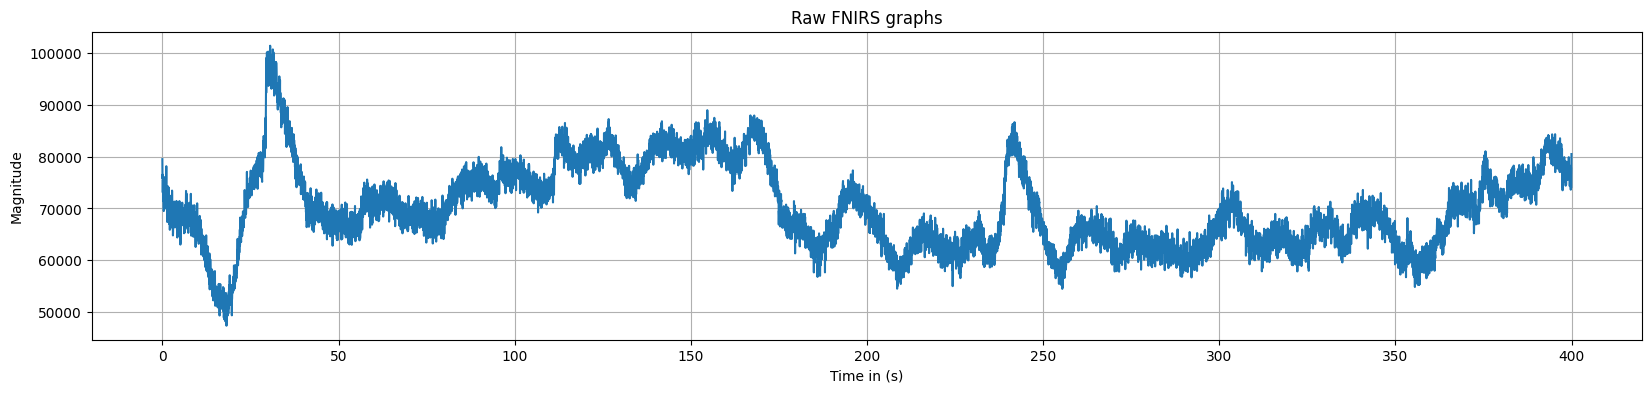

In [2]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1])
plt.title("Raw FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

#### <span style="color:#ff0054"> **Moving Average Filtering**

We will filter the high frequency noise component using moving average filter averaging over n samples. The following code is a function for moving average filter.

In [3]:
def moving_average(data, window):
    num_row = data.size  # Get the total number of elements
    flt_data = np.full(num_row, data.mean())  # Initialize the output array with the mean value of data

    for j in range(window - 1, num_row):
        k = j - (window - 1)
        flt_data[j] = data[k:j + 1].sum() / window  # Calculate the moving average

    return flt_data


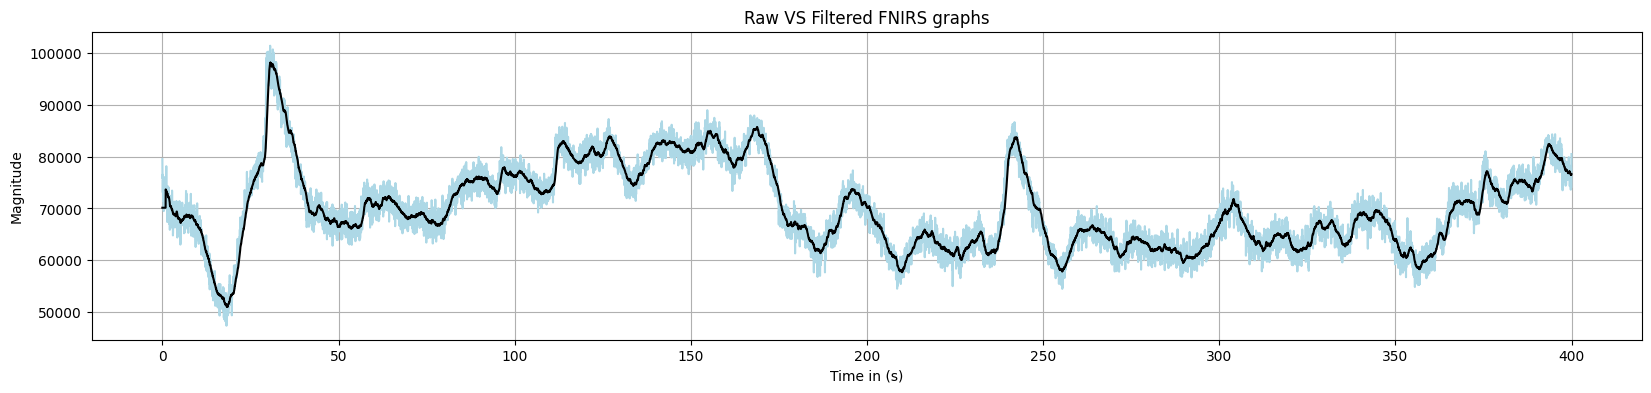

In [4]:
filtered_data=moving_average(data_main[:,1],25)
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.title("Raw VS Filtered FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


### ***Finding the Lag***
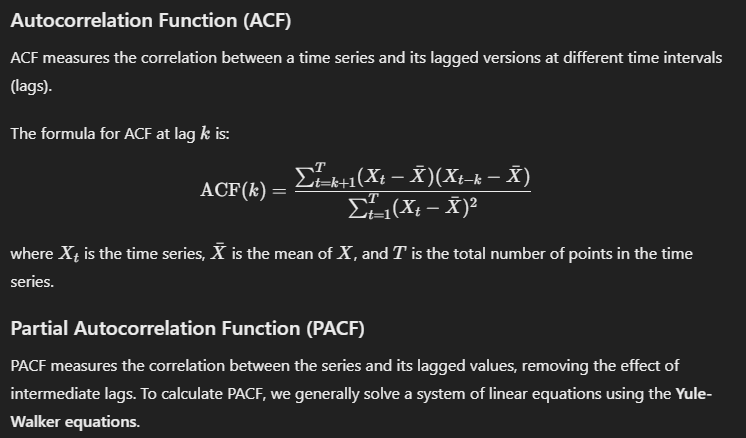

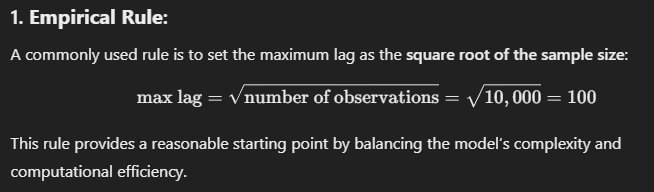

In [5]:
import numpy as np
data=data_main[:,1]

def calculate_acf(data, max_lag):
    """Calculate the ACF up to max_lag."""
    mean_data = np.mean(data)
    n = len(data)
    acf_values = []
    
    for lag in range(max_lag + 1):
        numerator = 0.0
        denominator = 0.0
        
        # Calculate numerator and denominator
        for t in range(lag, n):
            numerator += (data[t] - mean_data) * (data[t - lag] - mean_data)
        for t in range(n):
            denominator += (data[t] - mean_data) ** 2
        
        # ACF at this lag
        acf_values.append(numerator / denominator)
        
    return acf_values

def calculate_pacf(data, max_lag):
    """Calculate the PACF up to max_lag using Yule-Walker equations."""
    pacf_values = [1]  # PACF at lag 0 is always 1
    
    # Use Yule-Walker equations to compute PACF values
    for lag in range(1, max_lag + 1):
        # Create the Toeplitz matrix for the ACF values
        r = calculate_acf(data, lag)[:lag]  # ACF values up to the lag
        R = np.array([[r[abs(i - j)] for j in range(lag)] for i in range(lag)])
        rho = np.array(r)
        
        # Solve the system of linear equations
        pacf_values.append(np.linalg.solve(R, rho)[-1])  # last value is the PACF at current lag
        
    return pacf_values

max_lag = int(np.sqrt(row_num))

# Calculate ACF and PACF
acf_values = calculate_acf(data, max_lag)
pacf_values = calculate_pacf(data, max_lag)

print("ACF Values:", acf_values)
print("PACF Values:", pacf_values)


ACF Values: [1.0, 0.9582148221794682, 0.956722579051628, 0.9567596736875692, 0.9540242443749062, 0.9535611818859215, 0.9519761767045444, 0.9504634440844214, 0.9493762064227803, 0.9477021604318243, 0.9455524027519162, 0.9458269121349352, 0.9449857317043003, 0.9437543799760401, 0.9420202989512904, 0.9419274576100757, 0.9416555342827669, 0.9403963513029754, 0.9397814365901757, 0.9395411215080796, 0.9365630551459789, 0.9364628981136088, 0.9357070914483591, 0.9350199255565796, 0.9339418569672981, 0.9320256741871136, 0.9310851414503731, 0.9283460793400669, 0.9268655560774872, 0.9250784327029904, 0.923353157870951, 0.9211007040559444, 0.9184768558815626, 0.9173049662826954, 0.9143010629034307, 0.9123744532366717, 0.9109202793072517, 0.90766135877731, 0.9061864501938544, 0.9041353182215763, 0.9018945669275004, 0.8990049992393288, 0.8986826845158526, 0.896131582209129, 0.8944016973192775, 0.8921586298990342, 0.8907642831049708, 0.8887877957136445, 0.887478241534367, 0.884422680669496, 0.8820297

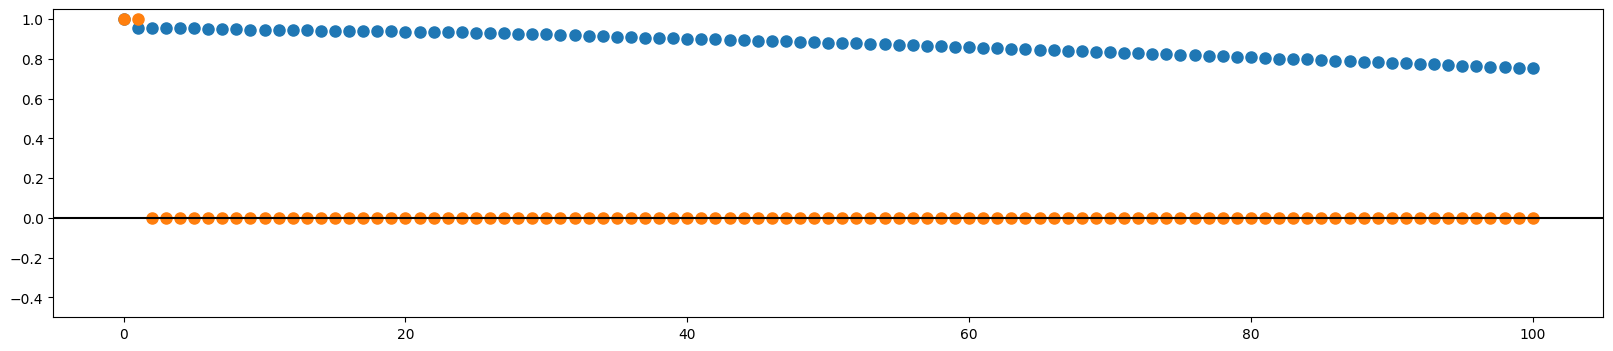

In [6]:
plt.figure(figsize=(20,4))
plt.plot(range(0,max_lag+1,1),acf_values,'o', markersize=8)
plt.plot(range(0,max_lag+1,1),pacf_values,'o', markersize=8)
plt.axhline(y=0,linestyle='solid', color='black')
plt.ylim(-0.5,1.05)
plt.show()

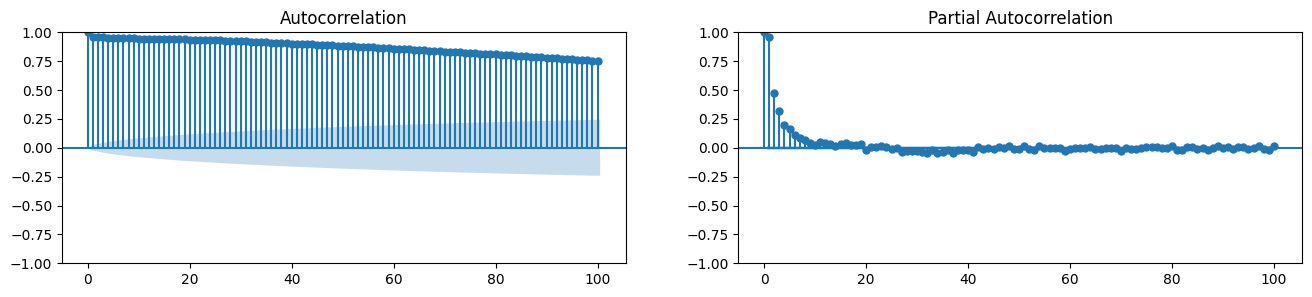

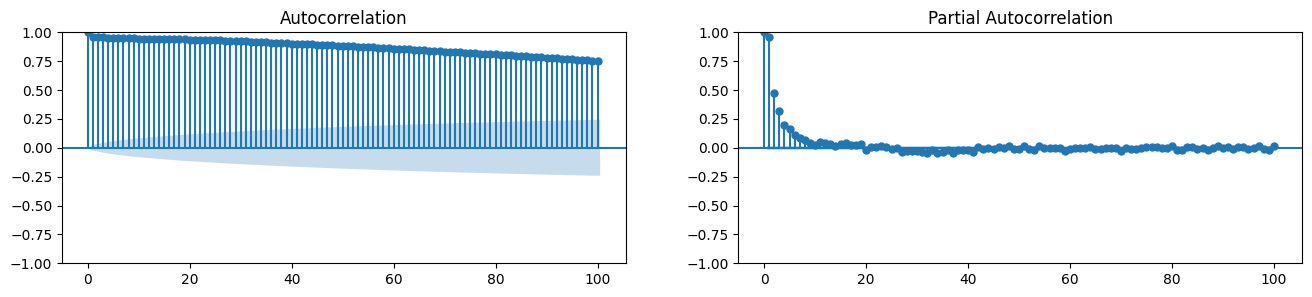

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data, lags=max_lag, ax=axes[0])
plot_pacf(data, lags=max_lag, ax=axes[1])

In [8]:
def calculate_ar_coefficients(data, order):

    n = len(data)
    
    # Prepare the design matrix for least squares
    X = np.zeros((n - order, order))
    y = np.zeros(n - order)
    
    for t in range(order, n):
        X[t - order, :] = data[t - order:t][::-1]
        y[t - order] = data[t]
    
    # Calculate coefficients using least squares: coefficients = (X^T * X)^-1 * X^T * y
    coefficients = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    return coefficients

# Example usage for an AR(2) model
data = data_main[:,1]
ar_order = 2
ar_coefficients = calculate_ar_coefficients(data, ar_order)
print("AR Coefficients:", ar_coefficients)


AR Coefficients: [0.51703809 0.48268695]


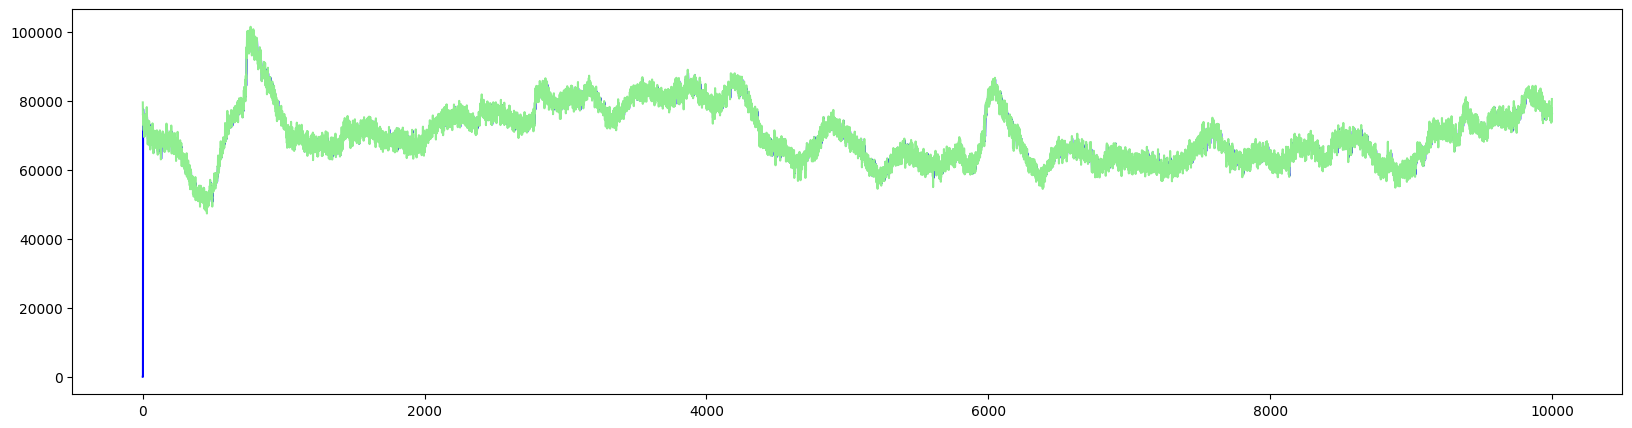

In [14]:
def manual_ar_model(data, coefficients, ar_order):
    n = len(data)
    predictions = [0] * n  # Initialize predictions with zeros
    
    for t in range(order, n):
        prediction = sum(coefficients[i] * data[t - i - 1] for i in range(order))
        predictions[t] = prediction
    
    return predictions

data = data_main[:,1]
order = 2

predicted_ar_values = manual_ar_model(data, ar_coefficients, order)
plt.figure(figsize=(20,5))
plt.plot(predicted_ar_values,color="blue")
plt.plot(data,color="lightgreen")
plt.show()

In [10]:
def calculate_ma_coefficients(data, ma_order, learning_rate=0.001, iterations=1000, clip_value=10.0):
    """
    Calculate the MA coefficients using gradient descent.
    
    Parameters:
        data (list or np.array): The time series data.
        ma_order (int): Order of the MA model (number of past errors).
        learning_rate (float): Learning rate for gradient descent.
        iterations (int): Number of iterations for gradient descent.
        clip_value (float): Value to clip gradients to avoid overflow.
    
    Returns:
        ma_coefficients (np.array): Estimated MA coefficients.
    """
    # Normalize the data to have zero mean and unit variance
    data = (data - np.mean(data)) / np.std(data)
    n = len(data)
    
    # Initialize MA coefficients
    ma_coefficients = np.random.randn(ma_order) * 0.1  # Small random initialization
    residuals = np.zeros(n)
    
    for _ in range(iterations):
        gradients_ma = np.zeros(ma_order)
        
        for t in range(ma_order, n):
            # Calculate the prediction based on past residuals
            ma_term = sum(ma_coefficients[j] * residuals[t - j - 1] for j in range(ma_order))
            prediction = ma_term  # Mean is zero after normalization
            
            # Calculate the residual/error at the current time step
            residuals[t] = data[t] - prediction
            
            # Update gradients for each coefficient
            for j in range(ma_order):
                gradients_ma[j] += -2 * residuals[t] * residuals[t - j - 1]
        
        # Clip the gradients to avoid overflow
        gradients_ma = np.clip(gradients_ma, -clip_value, clip_value)
        
        # Update MA coefficients using gradient descent
        ma_coefficients -= learning_rate * gradients_ma / n
    
    return ma_coefficients

# Example usage for an MA(2) model
data = data_main[:,1]

ma_order = 2
ma_coefficients = calculate_ma_coefficients(data, ma_order)
print("MA Coefficients:", ma_coefficients)

MA Coefficients: [-0.00759624  0.03491591]


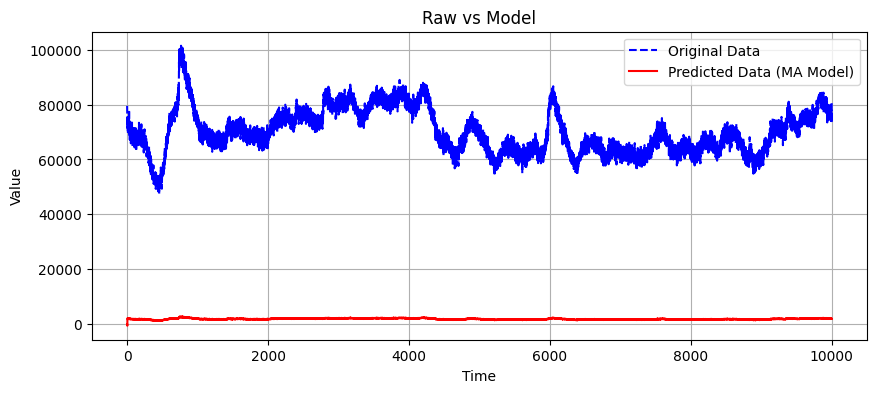

In [11]:
def calculate_residuals(data, coef, q=1):

    residuals = [0] * len(data)  # Initialize residuals with zero
    
    # Calculate residuals manually
    for t in range(q, len(data)):
        # Sum up the past residuals multiplied by the coefficients
        predicted_value = sum(coef[i] * residuals[t - i - 1] for i in range(q))
        residuals[t] = data[t] - predicted_value
    
    return residuals

def manual_ma_model(data, coef, q=1):

    # Initialize an empty list to store the predicted values
    predictions = [0] * len(data)
    
    # Calculate residuals manually
    residuals = calculate_residuals(data, coef, q)
    
    # Calculate predictions based on past residuals and coefficients
    for t in range(q, len(data)):
        predictions[t] = sum(coef[i] * residuals[t - i - 1] for i in range(q))
    
    return predictions, residuals

def plot_time_series(data, predictions, title="Time Series Data"):

    plt.figure(figsize=(10, 4))
    plt.plot(data, label="Original Data", color='blue', linestyle='dashed')
    plt.plot(predictions, label="Predicted Data (MA Model)", color='red' )
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

predictions,residuals=manual_ma_model(data, ma_coefficients, q=2)
plot_time_series(data, predictions, title="Raw vs Model")



In [15]:
def manual_differencing(data, order):
    """
    Apply differencing to make the time series stationary.

    Parameters:
        data (list or np.array): The time series data.
        order (int): The order of differencing.
    
    Returns:
        differenced_data (list): Differenced time series data.
    """
    differenced_data = data.copy()
    
    for _ in range(order):
        differenced_data = [differenced_data[i] - differenced_data[i - 1] for i in range(1, len(differenced_data))]
    
    return differenced_data

def calculate_arima_coefficients(data, ar_order, diff_order, ma_order, learning_rate=0.0001, iterations=1000):
    """
    Calculate the ARIMA coefficients using differencing and gradient descent.
    
    Parameters:
        data (list or np.array): The time series data.
        ar_order (int): Order of the AR model.
        diff_order (int): Order of differencing.
        ma_order (int): Order of the MA model.
        learning_rate (float): Learning rate for gradient descent.
        iterations (int): Number of iterations for gradient descent.
    
    Returns:
        ar_coefficients (np.array): Estimated AR coefficients.
        ma_coefficients (np.array): Estimated MA coefficients.
    """
    # Step 1: Apply differencing
    differenced_data = manual_differencing(data, diff_order)
    
    # Step 2: Calculate ARMA coefficients on differenced data
    ar_coefficients, ma_coefficients = calculate_arma_coefficients(differenced_data, ar_order, ma_order, learning_rate, iterations)
    
    return ar_coefficients, ma_coefficients

# Example usage for an ARIMA(2, 1, 1) model
diff_order = 1
arima_ar_coefficients, arima_ma_coefficients = calculate_arima_coefficients(data, ar_order, diff_order, ma_order)
print("ARIMA AR Coefficients:", arima_ar_coefficients)
print("ARIMA MA Coefficients:", arima_ma_coefficients)

ARIMA AR Coefficients: [ 0.23679998 -0.0280158 ]
ARIMA MA Coefficients: [-0.03115738]


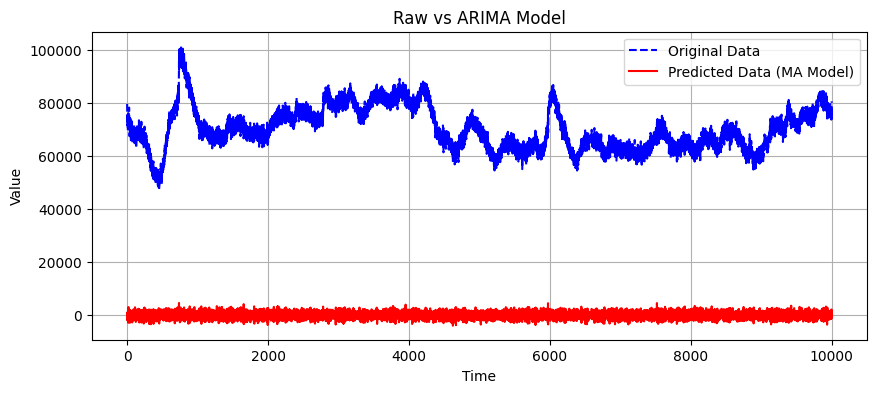

In [16]:
def manual_arima_model(data, ar_coefficients, ma_coefficients, ar_order, ma_order, diff_order):
  
    # Step 1: Apply differencing
    differenced_data = manual_differencing(data, diff_order)
    
    # Step 2: Apply ARMA model on differenced data
    predictions = manual_arma_model(differenced_data, ar_coefficients, ma_coefficients, ar_order, ma_order)
    
    return predictions

# Example: ARIMA(2, 1, 1) model with AR coefficients [0.6, -0.3] and MA coefficient [0.5], differencing order of 1
diff_order = 1

predicted_arima_values = manual_arima_model(data, ar_coefficients, ma_coefficients, ar_order, ma_order, diff_order)

plot_time_series(data, predicted_arima_values, title="Raw vs ARIMA Model")

In [12]:
def calculate_arma_coefficients(data, ar_order, ma_order, learning_rate=0.001, iterations=1000, clip_value=10.0):
    # Normalize the data
    data = (data - np.mean(data)) / np.std(data)
    n = len(data)
    
    # Initialize coefficients
    ar_coefficients = np.random.randn(ar_order) * 0.1  # Small random initialization
    ma_coefficients = np.random.randn(ma_order) * 0.1  # Small random initialization
    
    for _ in range(iterations):
        residuals = np.zeros(n)
        gradients_ar = np.zeros(ar_order)
        gradients_ma = np.zeros(ma_order)
        
        # Calculate residuals and gradients
        for t in range(max(ar_order, ma_order), n):
            ar_term = sum(ar_coefficients[i] * data[t - i - 1] for i in range(ar_order))
            ma_term = sum(ma_coefficients[j] * residuals[t - j - 1] for j in range(ma_order))
            prediction = ar_term + ma_term
            residuals[t] = data[t] - prediction
            
            # Calculate gradients for AR and MA coefficients
            for i in range(ar_order):
                gradients_ar[i] += -2 * residuals[t] * data[t - i - 1]
            for j in range(ma_order):
                gradients_ma[j] += -2 * residuals[t] * residuals[t - j - 1]
        
        # Clip gradients to avoid overflow
        gradients_ar = np.clip(gradients_ar, -clip_value, clip_value)
        gradients_ma = np.clip(gradients_ma, -clip_value, clip_value)
        
        # Update coefficients using gradient descent
        ar_coefficients -= learning_rate * gradients_ar / n
        ma_coefficients -= learning_rate * gradients_ma / n
    
    return ar_coefficients, ma_coefficients

# Example usage for an ARMA(2, 1) model
ar_order = 2
ma_order = 1
arma_ar_coefficients, arma_ma_coefficients = calculate_arma_coefficients(data, ar_order, ma_order)
print("ARMA AR Coefficients:", arma_ar_coefficients)
print("ARMA MA Coefficients:", arma_ma_coefficients)


ARMA AR Coefficients: [0.0887483  0.18352732]
ARMA MA Coefficients: [-0.02972226]


<Figure size 2000x500 with 0 Axes>

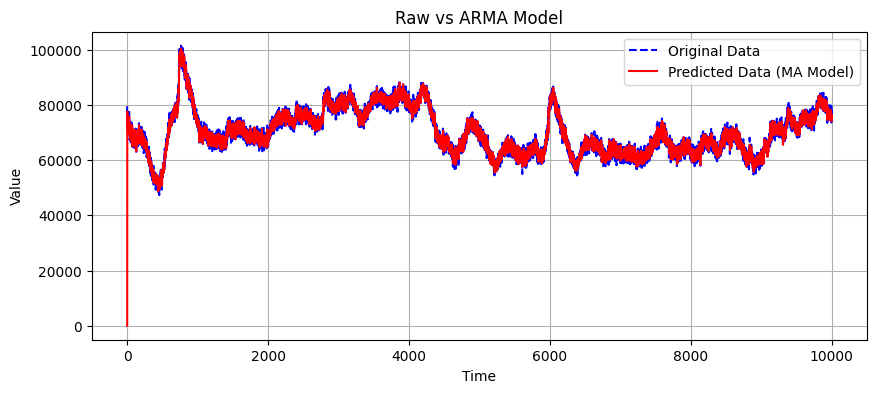

In [13]:
def manual_arma_model(data, arma_ar_coefficients, arma_ma_coefficients, ar_order, ma_order):

    n = len(data)
    predictions = [0] * n
    residuals = [0] * n  # Initialize residuals with zeros
    
    for t in range(max(ar_order, ma_order), n):
        ar_term = sum(ar_coefficients[i] * data[t - i - 1] for i in range(ar_order))
        ma_term = sum(ma_coefficients[j] * residuals[t - j - 1] for j in range(ma_order))
        
        predictions[t] = ar_term + ma_term
        residuals[t] = data[t] - predictions[t]
    
    return predictions

# Example: ARMA(2, 1) model with AR coefficients [0.6, -0.3] and MA coefficient [0.5]

predicted_arma_values = manual_arma_model(data, arma_ar_coefficients, arma_ma_coefficients, ar_order, ma_order)

plt.figure(figsize=(20,5))
plot_time_series(data, predicted_arma_values, title="Raw vs ARMA Model")
